Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


inertia value for k-means= 1 is 10000.00000000001
inertia value for k-means= 2 is 7362.474568675606
inertia value for k-means= 3 is 4966.688279698041
inertia value for k-means= 4 is 1780.4172638655577
inertia value for k-means= 5 is 924.3159961688092
inertia value for k-means= 6 is 892.7813492635016
inertia value for k-means= 7 is 859.8197875620259
inertia value for k-means= 8 is 824.6854971939616
inertia value for k-means= 9 is 793.4881869509848
inertia value for k-means= 10 is 761.839038868074


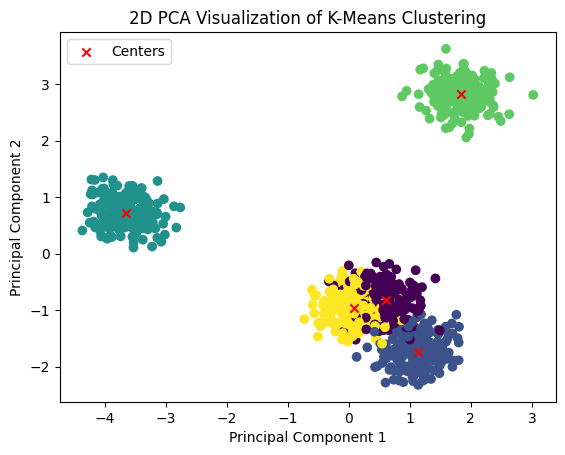

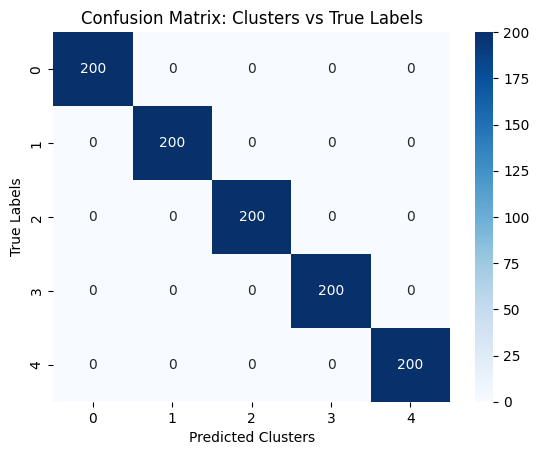

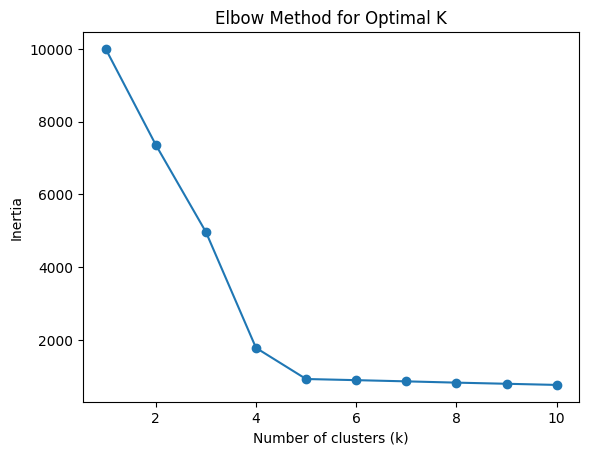

In [12]:
# your code here
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import seaborn as sns

#Computing inertia values
inertia_values = []
k_range = range(1,11)

for k in k_range:
  kmeans = KMeans(n_clusters = k).fit(X)
  inertia_values.append(kmeans.inertia_)
  print("inertia value for k-means=", k, "is", inertia_values[k-1])

#initialize PCA to 2 components
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)

#initialize KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

#cluster labels
labels = kmeans.labels_

centers = pca.transform(kmeans.cluster_centers_)

#plot results with PCA scaling
plt.scatter(principal_components[:,0], principal_components[:,1], c = labels, cmap='viridis', marker='o')
plt.scatter(centers[:,0], centers[:,1], c='red', marker = 'x', label = 'Centers')
plt.title("2D PCA Visualization of K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.savefig("PCA_vis_kcluster_blobs.png")
plt.show()

#confusion matrix
cm = confusion_matrix(y_true, labels)

#match clusters to actual using hungarian matching algorithm
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))

#remap labels to labels of original dataset
y_pred_mapped = np.array([mapping[label] for label in labels])

cm_mapped = confusion_matrix(y_true, y_pred_mapped)

sns.heatmap(cm_mapped, annot = True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Clusters vs True Labels")
plt.savefig("confusion_matrix_blobs.png")
plt.show()

#elbow analysis (just use the inertia values found before and plot))
plt.plot(k_range, inertia_values, marker = "o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.savefig("elbow_analysis_blobs.png")
plt.show()


# 2. Clustering Fashion-MNIST using $k$-means

In [13]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


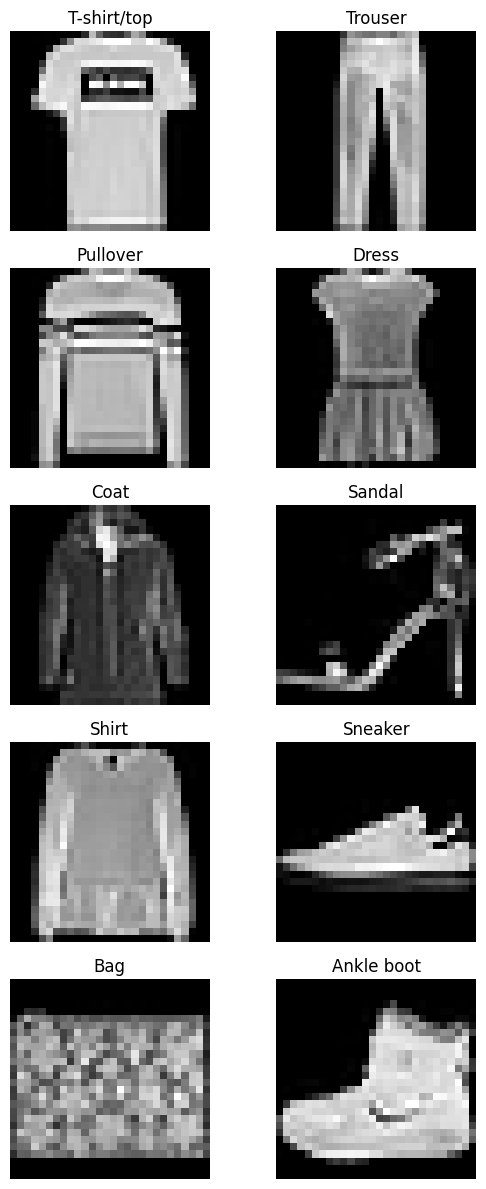

inertia value for k-means= 1 is 34138349.39766804
inertia value for k-means= 2 is 25382476.714449994
inertia value for k-means= 3 is 21170959.950483635
inertia value for k-means= 4 is 17307313.07840231
inertia value for k-means= 5 is 15600205.231328368
inertia value for k-means= 6 is 14006506.405464318
inertia value for k-means= 7 is 13051444.951430973
inertia value for k-means= 8 is 11587085.973108971
inertia value for k-means= 9 is 10862867.778343191
inertia value for k-means= 10 is 9949722.298939547
inertia value for k-means= 11 is 9553939.554793676
inertia value for k-means= 12 is 8756920.783817025
inertia value for k-means= 13 is 8369661.388364294
inertia value for k-means= 14 is 8109390.531269274
inertia value for k-means= 15 is 7806032.384132886
inertia value for k-means= 16 is 7479475.614649646
inertia value for k-means= 17 is 7269060.352042483
inertia value for k-means= 18 is 7001917.827601293
inertia value for k-means= 19 is 6868815.424219853
inertia value for k-means= 20 is 

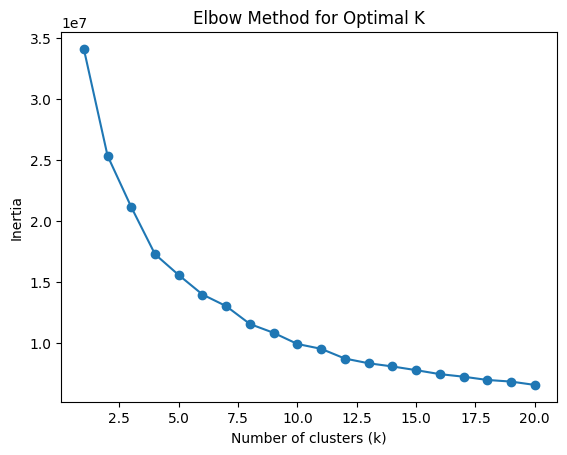

K-means Adjusted Rand Index (ARI): 0.342


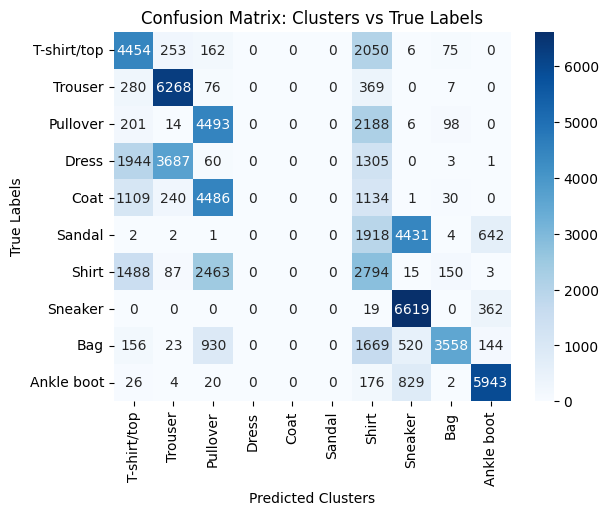

KeyboardInterrupt: 

In [14]:
# your code here
from sklearn.metrics import adjusted_rand_score
#plotting articles of clothing
clothing_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#take first example in each class
unique_clothing = []
for label in np.unique(y):
  idx = np.where(y == label)[0][0]
  unique_clothing.append((X[idx], label))

#plot 5x2
fig,axes = plt.subplots(5,2,figsize = (6,12))

for ax, (img_flattened, label) in zip(axes.flat, unique_clothing):
  ax.imshow(img_flattened.reshape(28,28), cmap="gray")
  ax.set_title(clothing_names[label])
  ax.axis("off")
plt.tight_layout()
plt.savefig("clothings.png")
plt.show()

#k-means clusters analysis
#standardize the dataset
X = StandardScaler().fit_transform(X)

#reduce dimensions with PCA since large dataset
pca = PCA(n_components = 10)
pca_X = pca.fit_transform(X)

#Computing inertia values
inertia_values = []
k_range = range(1,21)

for k in k_range:
  kmeans = KMeans(n_clusters = k).fit(pca_X)
  inertia_values.append(kmeans.inertia_)
  print("inertia value for k-means=", k, "is", inertia_values[k-1])

#elbow analysis (just use the inertia values found before and plot))
plt.plot(k_range, inertia_values, marker = "o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.savefig("elbow_analysis_fashion.png")
plt.show()

#initialize KMeans
kmeans = KMeans(n_clusters = 10)
y_pred = kmeans.fit_predict(X)

#confusion matrix
cm = confusion_matrix(y, y_pred)

#match clusters to actual using hungarian matching algorithm
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))

#remap labels to labels of original dataset
y_pred_mapped = np.array([mapping[label] for label in y_pred])

#evaluate results
ari_kmeans = adjusted_rand_score(y, y_pred_mapped)
print(f"K-means Adjusted Rand Index (ARI): {ari_kmeans:.3f}")

cm_mapped = confusion_matrix(y, y_pred_mapped)

sns.heatmap(cm_mapped, annot = True, fmt="d", cmap="Blues", xticklabels=clothing_names, yticklabels=clothing_names)
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Clusters vs True Labels")
plt.savefig("confusion_matrix_fashion_kmeans.png")
plt.show()

#2D PCA visualization
#initialize PCA to 2 components
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)

#initialize KMeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X)

#cluster labels
labels = kmeans.labels_

centers = pca.transform(kmeans.cluster_centers_)

#plot results with PCA scaling
plt.scatter(principal_components[:,0], principal_components[:,1], c = labels, cmap='viridis', marker='o')
plt.scatter(centers[:,0], centers[:,1], c='red', marker = 'x', label = 'Centers')
plt.title("2D PCA Visualization of K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.savefig("2DPCA_fashion_kmeans.png")
plt.show()


# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import pairwise_distances
from scipy.stats import pearsonr, spearmanr

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

#plotting articles of clothing
clothing_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

X = StandardScaler().fit_transform(X)

#target dimensions to explore with PCA and random projection
dimensions = [10, 20, 50, 100, 200]

#storage setup
pca_pearson, pca_spearman = [],[]
rp_pearson, rp_spearman = [],[]

#only sample 10000 random pairs, since dataset would be too large to compute
n = X.shape[0]
idx_i = np.random.randint(0, n, size = 10000)
idx_j = np.random.randint(0, n, size = 10000)

#original pairwise distances
original_D = np.linalg.norm(X[idx_i] - X[idx_j], axis = 1)

#perform pca and random projection for each target dimension
for k in dimensions:
  #PCA
  pca_X = PCA(n_components = k).fit_transform(X)
  pca_d = np.linalg.norm(pca_X[idx_i] - pca_X[idx_j], axis = 1)
  r_p, _ = pearsonr(original_D, pca_d)
  r_s, _ = spearmanr(original_D, pca_d)
  pca_pearson.append(r_p)
  pca_spearman.append(r_s)

  #Random Projection
  rp_X = GaussianRandomProjection(n_components = k).fit_transform(X)
  rp_d = np.linalg.norm(rp_X[idx_i] - rp_X[idx_j], axis = 1)
  r_p, _ = pearsonr(original_D, rp_d)
  r_s, _ = spearmanr(original_D, rp_d)
  rp_pearson.append(r_p)
  rp_spearman.append(r_s)

#plot results
fig, axes = plt.subplots(1, 2, figsize=(12,5))

#Pearson plot
axes[0].plot(dimensions, pca_pearson, marker="o", label = "PCA")
axes[0].plot(dimensions, rp_pearson, marker="s", label="Random Projection")
axes[0].set_title("Pearson Correlation")
axes[0].set_xlabel("Target dimension k")
axes[0].set_ylabel("Correlation with original distance")
axes[0].legend()
axes[0].grid(True)

#Spearman plot
axes[1].plot(dimensions, pca_spearman, marker="o", label="PCA")
axes[1].plot(dimensions, rp_spearman, marker="s", label = "Random Projection")
axes[1].set_title("Spearman Correlation")
axes[1].set_xlabel("Target dimension k")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("PCA vs Random Projection of Fashion-MNIST", fontsize = 14)
plt.tight_layout()
plt.savefig("PCA_vs_randomProjection.png")
plt.show()



# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here
from sklearn.cluster import SpectralClustering

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

#plotting articles of clothing
clothing_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#dataset is too large, take a subset
sample_size = 1000
sample_indices = np.random.choice(range(70000), size = sample_size, replace = False)
X = X[sample_indices]
y = y[sample_indices]

X = StandardScaler().fit_transform(X)

#dimension reduction
pca = PCA(n_components = 25)
pca_X = pca.fit_transform(X)

#spectral clustering
spectral = SpectralClustering(n_clusters = 10, affinity = 'nearest_neighbors', n_neighbors = 10, assign_labels = 'kmeans')
y_pred = spectral.fit_predict(pca_X)

#confusion matrix
cm = confusion_matrix(y, y_pred)

#match clusters to actual using hungarian matching algorithm
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))

#remap labels to labels of original dataset
y_pred_mapped = np.array([mapping[label] for label in y_pred])

#evaluate results
ari_spectral = adjusted_rand_score(y, y_pred_mapped)
print(f"Spectral Clustering Adjusted Rand Index (ARI): {ari_spectral:.3f}")

cm_mapped = confusion_matrix(y, y_pred_mapped)

sns.heatmap(cm_mapped, annot = True, fmt="d", cmap="Blues", xticklabels=clothing_names, yticklabels=clothing_names)
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Clusters vs True Labels")
plt.savefig("confusion_matrix_fashion_spectral.png")
plt.show()

#2D PCA visualization
#initialize PCA to 2 components
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(pca_X)

#plot results with PCA scaling
plt.scatter(principal_components[:,0], principal_components[:,1], c = y_pred_mapped, cmap='viridis', s=20)
plt.title("2D PCA Visualization of Spectral Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.savefig("2DPCA_fashion_spectral.png")
plt.show()
